NUMERICAL INTEGRATION AND ITS APPLICATIONS

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
def Comp_midpoint(f,a,b,N=100):
	x_vec = np.linspace(a, b, num=N, endpoint=True, retstep=False, dtype=None, axis=0)

	s = 0
	for i in range(len(x_vec)-1):
		a = x_vec[i]
		b = x_vec[i+1]
		wi = (b-a) # this can be optimized by lifting, but this reflects more the equation
		x = (a+b)/2
		s += f(x)*wi
		#print(s,x,a,b,wi)
	return s

# A litle test for myself
f = lambda x : 1
a,b = 0,1

Comp_midpoint(f,a,b,3)

1.0

In [3]:
def Comp_trapazoid(f,a,b,N=100):
	x_vec = np.linspace(a, b, num=N, endpoint=True, retstep=False, dtype=None, axis=0)
	s = 0
	for i in range(len(x_vec)-1):
		a = x_vec[i]
		b = x_vec[i+1]
		wi = (b-a)/2 # this can be optimized by lifting, but this reflects more the equation
		s += (f(a)+f(b))*wi
		#print(s,a,b,wi)
	return s

# A litle test for myself
f = lambda x : 1
a,b = 0,1

Comp_trapazoid(f,a,b,5)

1.0

The next function is for exercise 1.c

In [4]:
def Mistake_trapazoid(f,a,b,N=100):
	x_vec = np.linspace(a, b, num=N, endpoint=True, retstep=False, dtype=None, axis=0)

	s = 0
	for i in range(len(x_vec)-1):
		a = x_vec[i]
		b = x_vec[i+1]
		wi = (b - a)/N # this is the introduced mistake
		s += (f(a)+f(b))*wi
	return s

# A litle test for myself
f = lambda x : 1
a,b = 0,1

Mistake_trapazoid(f,a,b,5)

0.4

In [5]:
def Comp_simpsons(f,a,b,N=100):
	x_vec = np.linspace(a, b, num=N, endpoint=True, retstep=False, dtype=None, axis=0)
	s = 0
	for i in range(len(x_vec)-1):
		a = x_vec[i]
		b = x_vec[i+1]
		wi = (b-a)/6
		s += wi* ( f(a) + 4*f( (a+b)/2 )  + f(b) )
		#print(s,a,b,wi)
	return s

# A litle test for myself
f = lambda x : 1
a,b = 0,1

Comp_simpsons(f,a,b,5)

1.0

Helper function for calculating the convergence rate

In [6]:
from math import log2

#helper function for calculating the convergence rate
def convergence_rate(rule,f,a,b,true_value,N=16):

	error_N = abs(true_value - rule(f,a,b,N))
	error_2N= abs(true_value - rule(f,a,b,2*N))
	#print(error_N,"		",error_2N)

	_2r = error_N/error_2N
	r = log2(_2r)
	#print(r)
	return error_N,r

Exercise 1.a
Calculate sin(x) on [0,pi/2]

Integral of sin(x) on [0,pi/2]:
Midpoint	 1.0012703678331198 error: -0.0012703678331198454
Trapezoidal	 0.9974602317917259 error: 0.0025397682082740625
Simpsons	 1.0000003224859886 error: -3.224859885797571e-07


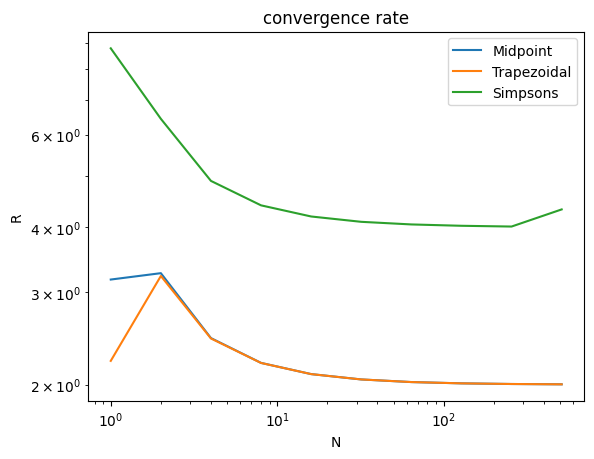

In [7]:
f = lambda x : math.sin(x)
#f = lambda x : x*x
a,b = 0,math.pi/2
#a,b = 0,1
true_value = 1
N=10

mid_val = Comp_midpoint(f,a,b,N)
trap_val = Comp_trapazoid(f,a,b,N)
simp_val = Comp_simpsons(f,a,b,N)

print("Integral of sin(x) on [0,pi/2]:")
print("Midpoint	",mid_val,"error:",true_value-mid_val)
print("Trapezoidal	",trap_val,"error:",true_value-trap_val)
print("Simpsons	",simp_val,"error:",true_value-simp_val)


#convergence_rate(Comp_midpoint,f,a,b,true_value)
#convergence_rate(Comp_trapazoid,f,a,b,true_value)
#convergence_rate(Comp_simpsons,f,a,b,true_value)

x_plot = []
y_plot = []
for i in range(10):
	n = pow(2,i)

	error,r = convergence_rate(Comp_midpoint,f,a,b,true_value,n)
	y_plot.append(r)
	#h = (b - a)/n
	#print("h",h,"n",n,"r",r)
	x_plot.append(n)
	#print(n,convergence_rate(Comp_midpoint,f,a,b,true_value,n))
	pass

plt.loglog(x_plot,y_plot,label="Midpoint")
plt.title("convergence rate")
plt.xlabel("N")
plt.ylabel("R")


x_plot = []
y_plot = []
for i in range(10):
	n = pow(2,i)

	error,r = convergence_rate(Comp_trapazoid,f,a,b,true_value,n)
	y_plot.append(r)
	#h = (b - a)/n
	#print("h",h,"n",n,"r",r)
	x_plot.append(n)
	#print(n,convergence_rate(Comp_midpoint,f,a,b,true_value,n))
	pass

plt.loglog(x_plot,y_plot,label="Trapezoidal")

x_plot = []
y_plot = []
for i in range(10):
	n = pow(2,i)

	error,r = convergence_rate(Comp_simpsons,f,a,b,true_value,n)
	y_plot.append(r)
	#h = (b - a)/n
	#print("h",h,"n",n,"r",r)
	x_plot.append(n)
	#print(n,convergence_rate(Comp_midpoint,f,a,b,true_value,n))
	pass

plt.loglog(x_plot,y_plot,label="Simpsons")
plt.legend()


Text(0, 0.5, 'R')

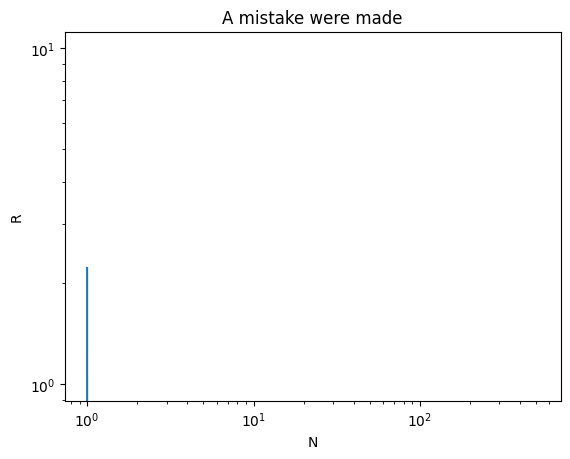

In [8]:
f = lambda x : math.sin(x)
#f = lambda x : x*x
a,b = 0,math.pi/2
#a,b = 0,1
true_value = 1

x_plot = []
y_plot = []
for i in range(10):
	n = pow(2,i)

	error,r = convergence_rate(Mistake_trapazoid,f,a,b,true_value,n)
	y_plot.append(r)
	h = (b - a)/n
	#print("h",h,"n",n,"r",r)
	x_plot.append(n)
	pass

plt.loglog(x_plot,y_plot)
plt.title("A mistake were made")
plt.xlabel("N")
plt.ylabel("R")

true_value 0.2635396737805913
Errors with N= 10
{'Euler': 0.010394639586606469, 'BackEuler': 0.011905586719526517, 'Crank': 0.00011065469347504298}


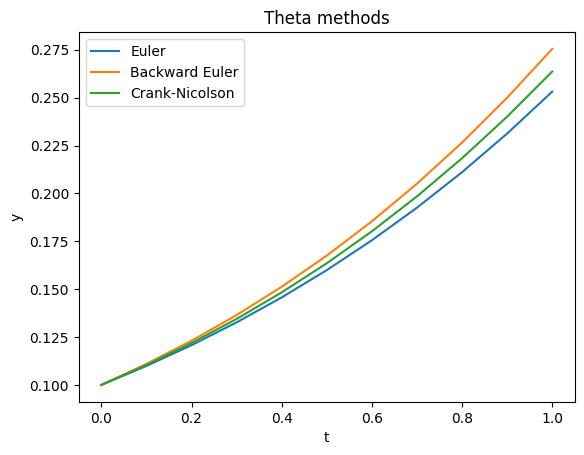

In [9]:
#Simple itaration from last assigment
def simple_iteration(g,x0,err=4,MAX_ITER=1000):
	if err > 1:
		err = pow(10,-err)
	x_last = x0
	x=x0
	#max_iter_is_reached = True
	for i in range(1,MAX_ITER):
		x = g(x)

		if abs(x - x_last) < err:
			#print("iteration =",i, "x =",x)
			return x,i
			break
		x_last = x
		#print(x)
	raise(Exception("Out of iteration!"))


def Euler(yt,y0,T,N):
	h = T/N
	func = [y0]
	x_axis = [0]
	h_pos = 0
	y = y0
	ylast = y0
	for i in range(N):
		y = ylast + h*yt(ylast)
		ylast = y
		func.append(y)
		h_pos+=h
		x_axis.append(h_pos)
	return func,x_axis

def Euler_backward(yt,y0,T,N):
	h = T/N
	func = [y0]
	x_axis = [0]
	h_pos = 0
	#print(y0)
	y = y0
	ylast = y0
	for i in range(N):
		g = lambda x : ylast + h*yt(x)
		#do it, nested iteration
		back_e,_ = simple_iteration(g,ylast)
		y = back_e
		ylast = y
		func.append(y)
		h_pos+=h
		x_axis.append(h_pos)
	return func,x_axis

def Cranky_Nicolson(yt,y0,T,N):
	h = T/N
	func = [y0]
	x_axis = [0]
	h_pos = 0
	#print(y0)
	y = y0
	ylast = y0
	for i in range(N):
		hf = 0.5*h*yt(ylast)
		g = lambda x : ylast + hf + 0.5*h*yt(x)
		#do it, nested iteration
		y,_ = simple_iteration(g,ylast)
		ylast = y
		func.append(y)
		h_pos+=h
		x_axis.append(h_pos)
	return func,x_axis


errors = {}

yt = lambda t : t - pow(t,3)
y0 = 0.1
T = 1
N = 10
plot_y,plot_x = Euler(yt,y0,T,N)
errors["Euler"] = (plot_y[-1]) # save last element
plt.plot(plot_x,plot_y,label='Euler')

plot_y,plot_x = Euler_backward(yt,y0,T,N)
errors["BackEuler"] = (plot_y[-1]) # save last element
plt.plot(plot_x,plot_y,label='Backward Euler') 

plot_y,plot_x = Cranky_Nicolson(yt,y0,T,N)
errors["Crank"] = (plot_y[-1]) # save last element
plt.plot(plot_x,plot_y,label='Crank-Nicolson')
plt.title("Theta methods")
plt.ylabel("y")
plt.xlabel("t")
plt.legend()

#The "true"  value in last pos
yt = lambda t : y0/math.sqrt( y0*y0 - (y0*y0-1) * math.exp(-2*t) )
true_value = yt(1)
#true_value = yt(plot_x[-1])
print("true_value",true_value)

errors["Euler"]		= abs(true_value-errors["Euler"]	)
errors["BackEuler"]	= abs(true_value-errors["BackEuler"])
errors["Crank"]		= abs(true_value-errors["Crank"]	)

print("Errors with N=",N)
print(errors)



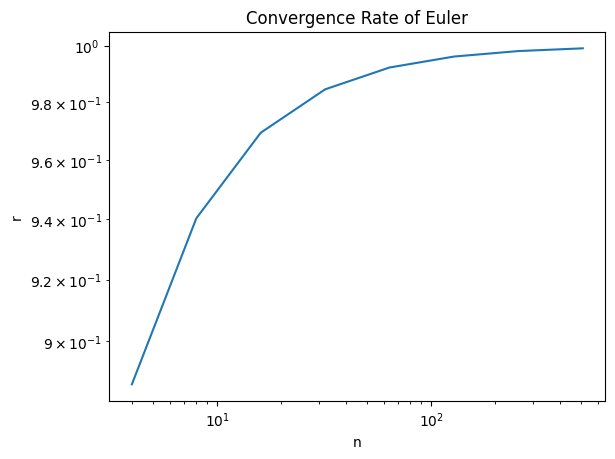

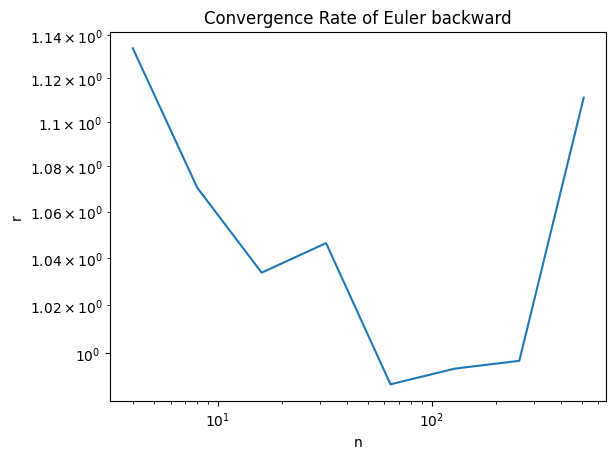

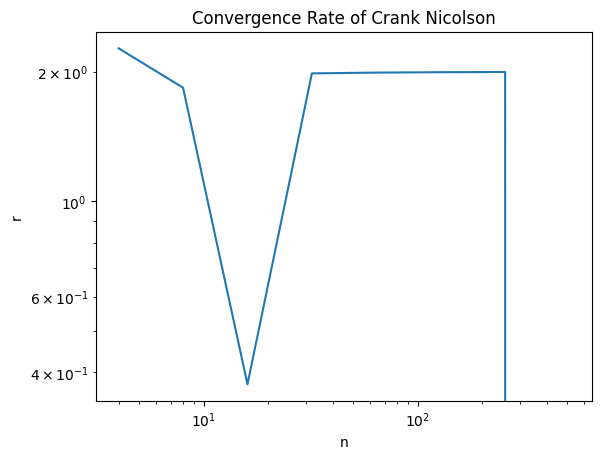

In [10]:
def plot_convergence_rate_for_theta_methods(name,method,yt,y0,T,true_value):

	N = 10

	plt.figure(name)

	x_plot = []
	y_plot = []
	for i in range(2,N):
		n = pow(2,i)
		y,_ = method(yt,y0,T,n)
		error_N = abs(true_value - y[-1])		
		y,_ = method(yt,y0,T,2*n)
		error_2N = abs(true_value - y[-1])
		r=log2(error_N / error_2N)
		#print(error_N/error_2N)
		#print(r)
		y_plot.append(r)
		x_plot.append(n)
		pass

	plt.loglog(x_plot,y_plot)
	plt.title("Convergence Rate of "+name)
	plt.ylabel("r")
	plt.xlabel("n")


# if somehow this value is not calculated
yt = lambda t : y0/math.sqrt( y0*y0 - (y0*y0-1) * math.exp(-2*t) )
true_value = yt(1)


yt = lambda t : t - pow(t,3)
y0 = 0.1
T = 1
plot_convergence_rate_for_theta_methods("Euler",Euler,yt,y0,T,true_value)
plot_convergence_rate_for_theta_methods("Euler backward",Euler_backward,yt,y0,T,true_value)
plot_convergence_rate_for_theta_methods("Crank Nicolson",Cranky_Nicolson,yt,y0,T,true_value)



In [11]:
plot_x[-1]

0.9999999999999999